In [3]:
import collections
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt

### Part 1: Physical analysis
First, patients' physical data will be analyzed. We will collect data from patient profile table, patient incident table and patient trends table, and create two new tables -- physical measurement and physical incident. Physical measurement table serves as a lookup table containing general info such as age, gender and weight. Physical incident table records dynamic healthcare data such as pulse rate, respiratory rate and blood pressure.

Below is the template of the two tables.

In [2]:
# blood pressure baseline
# https://www.disabled-world.com/calculators-charts/bloodpressurechart.php
blood_pressure_low_lookup = [[83, 84, 85, 86, 84], [83, 84, 85, 87, 88]]
blood_pressure_high_lookup = [[124, 126, 129, 130, 134], [125, 127, 128, 131, 135]]

phy_mea_df = pd.read_csv('phy_mea_dummy.csv')

# Add low and high blood pressure boundries into the table
phy_mea_df['bp_low'] = np.random.randn(phy_mea_df.shape[0])
phy_mea_df['bp_high'] = np.random.randn(phy_mea_df.shape[0])

#phy_mea_df[phy_mea_df['age'] <= 45]['bp_low'] = blood_pressure_low_lookup[phy_mea_df['gender']][0]
phy_mea_df.head()

,patient_id,age,gender,stage,weight,body_fat,bp_low,bp_high
0,0,56,0,1,57,26,-0.770047,-1.017275
1,1,76,1,3,74,28,1.255135,-0.589597
2,2,63,1,1,72,24,-0.971768,-1.156674
3,3,79,0,2,60,20,2.031320,0.330605
4,4,84,0,4,54,22,-0.603632,0.368394


### Part 2: 

In [4]:
patient = [[random.randint(30, 50) for _ in range(10)] for _ in range(100)]
normal = [[random.randint(85, 100) for _ in range(10)] for _ in range(100)]
training = np.array(np.concatenate((patient, normal), axis = 0))

In [5]:
label = np.array([1] * 100 + [0] * 100)

In [6]:
clf = svm.SVC(kernel='linear')
clf.fit(training, label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
print(clf.score(training, label))
y_hat = clf.predict(training)
accuracy_score(y_hat, label, 'training data')

1.0


1.0

In [8]:
patient_test = [[random.randint(0, 45) for _ in range(10)] for _ in range(20)]
normal_test = [[random.randint(90, 99) for _ in range(10)] for _ in range(20)]
test = np.array(np.concatenate((patient_test, normal_test), axis = 0))
label_test = np.array([1] * 20 + [0] * 20)

In [9]:
y_test = clf.predict(test)

In [10]:
print(clf.score(test, label_test))
y_hat = clf.predict(test)
accuracy_score(y_hat, label_test, 'testing data')

1.0


1.0

In [11]:
x = np.concatenate((training, test), axis = 0)
y = np.concatenate((label, label_test), axis = 0)

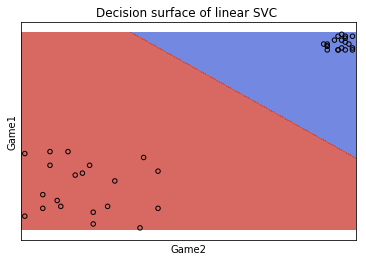

In [12]:
predict_Z = []
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    predict_Z = Z
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X = training[:, :2]  # we only take the first two features.
y = label

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = test[:, 0], test[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=predict_Z, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Game1')
ax.set_xlabel('Game2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()